In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv("C:/Users/Anmol/Desktop/data science/titanic_train.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


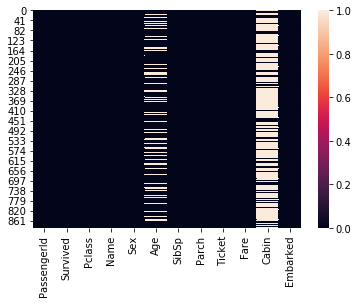

In [6]:
sb.heatmap(dataset.isnull())

In [7]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


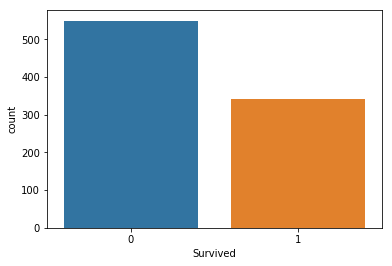

In [8]:
sb.countplot(x="Survived",data=dataset)

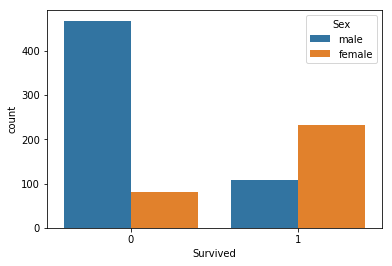

In [9]:
sb.countplot(x="Survived",hue="Sex",data=dataset)

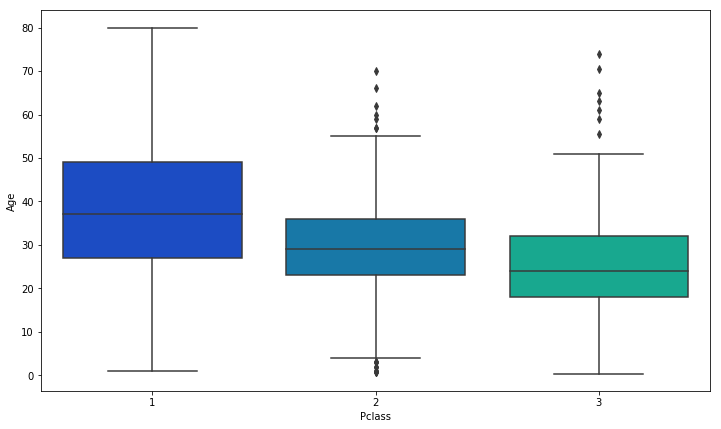

In [10]:
plt.figure(figsize=(12,7))
sb.boxplot(x="Pclass",y="Age",data=dataset,palette='winter')

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else :
        return Age

In [12]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

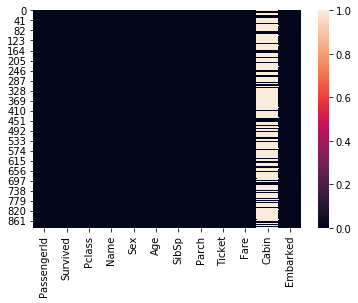

In [13]:
sb.heatmap(dataset.isnull())

In [14]:
# axis=1 means all values in columns
#axis=0 means all values in rows
dataset.drop("Cabin",axis=1,inplace=True)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [16]:
pd.unique(dataset.Embarked)

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
dataset.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [19]:
common_value="S"
dataset['Embarked'] = dataset["Embarked"].fillna(common_value)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


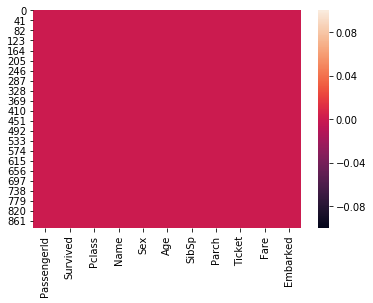

In [20]:
sb.heatmap(dataset.isnull())

In [21]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset["Embarked"],drop_first=True)

In [22]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [24]:
dataset.shape

(891, 9)

In [25]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1),
                                                    dataset['Survived'],test_size=0.20,
                                                   random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
prediction = logmodel.predict(X_test)

C:\Users\Anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
logmodel.score(X_test,y_test)

0.7988826815642458

In [29]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,1,45.5,0,0,28.500,1,0,1
700,1,18.0,1,0,227.525,0,0,0
748,1,19.0,1,0,53.100,1,0,1
751,3,6.0,0,1,12.475,1,0,1
481,2,29.0,0,0,0.000,1,0,1


In [30]:
logmodel.predict(X_test)[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [31]:
logmodel.predict_proba(X_test)[0:5]
#first column not going to survive----0
#second column going to survive----1

array([[0.68922078, 0.31077922],
       [0.03544584, 0.96455416],
       [0.56258477, 0.43741523],
       [0.82130367, 0.17869633],
       [0.78997294, 0.21002706]])

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.83      0.69      0.75        80

   micro avg       0.80      0.80      0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[88 11]
 [25 55]]


In [34]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [72]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

In [73]:
probs = logmodel.predict_proba(X_test)
probs

array([[0.68922078, 0.31077922],
       [0.03544584, 0.96455416],
       [0.56258477, 0.43741523],
       [0.82130367, 0.17869633],
       [0.78997294, 0.21002706],
       [0.91933764, 0.08066236],
       [0.63727084, 0.36272916],
       [0.87021806, 0.12978194],
       [0.16145264, 0.83854736],
       [0.43341797, 0.56658203],
       [0.78997294, 0.21002706],
       [0.89724831, 0.10275169],
       [0.3728317 , 0.6271683 ],
       [0.87652383, 0.12347617],
       [0.84553317, 0.15446683],
       [0.912958  , 0.087042  ],
       [0.52229872, 0.47770128],
       [0.85402234, 0.14597766],
       [0.85016522, 0.14983478],
       [0.26125779, 0.73874221],
       [0.90427148, 0.09572852],
       [0.93915683, 0.06084317],
       [0.37365587, 0.62634413],
       [0.42171295, 0.57828705],
       [0.9280764 , 0.0719236 ],
       [0.76682725, 0.23317275],
       [0.85030694, 0.14969306],
       [0.78236347, 0.21763653],
       [0.90435968, 0.09564032],
       [0.92314356, 0.07685644],
       [0.

In [74]:
probs = probs[:,1]
probs

array([0.31077922, 0.96455416, 0.43741523, 0.17869633, 0.21002706,
       0.08066236, 0.36272916, 0.12978194, 0.83854736, 0.56658203,
       0.21002706, 0.10275169, 0.6271683 , 0.12347617, 0.15446683,
       0.087042  , 0.47770128, 0.14597766, 0.14983478, 0.73874221,
       0.09572852, 0.06084317, 0.62634413, 0.57828705, 0.0719236 ,
       0.23317275, 0.14969306, 0.21763653, 0.09564032, 0.07685644,
       0.7626157 , 0.90402512, 0.62636031, 0.13028201, 0.07912587,
       0.92078442, 0.10737   , 0.0770248 , 0.08306407, 0.38625271,
       0.61178303, 0.56658203, 0.83414696, 0.28916669, 0.17987782,
       0.36336844, 0.06633314, 0.31130058, 0.0933928 , 0.21002706,
       0.75537286, 0.36221066, 0.72724371, 0.66994534, 0.62636031,
       0.12385564, 0.15148097, 0.14492106, 0.29353456, 0.91322254,
       0.8932731 , 0.15218702, 0.06452605, 0.59822626, 0.08246611,
       0.24587414, 0.76679086, 0.62171077, 0.58094164, 0.35753729,
       0.56067141, 0.14481417, 0.14156892, 0.13883978, 0.56729

In [75]:
auc =roc_auc_score(y_test, probs)
print("AUC: %.2f"%auc)


AUC: 0.88


In [76]:
fpr, tpr, thresholds = roc_curve(y_test,probs)


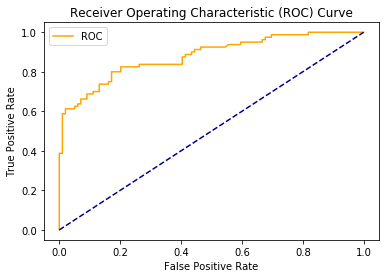

In [77]:
plot_roc_curve(fpr, tpr)